In [4]:
import wandb
import pytorch_lightning as pl
import torch

#from ms_benchmark.models.baseline_dynamic import models as dynamic_models
#from ms_benchmark.models.baseline_dynamic import data_utils as dynamic_data_utils

#from ms_benchmark.models.baseline_static import models as static_models
#from ms_benchmark.models.baseline_static import data_utils as static_data_utils

#from ms_benchmark.models.RNN import models as RNN_models
#from ms_benchmark.models.RNN import data_utils as RNN_data_utils

#from ms_benchmark.models.attention import models_new as attention_models
#from ms_benchmark.models.attention import data_utils as attention_data_utils

#from ms_benchmark import predict_utils, calibration_utils

from sklearn.metrics import roc_auc_score, auc, precision_recall_curve, brier_score_loss
from sklearn.calibration import calibration_curve
import copy

from ms_benchmark import DATA_DIR

import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

In [2]:
config = {"Dynamic Baseline" : ("s2rpzi9y",dynamic_models.PointWiseModel, dynamic_data_utils.PointWiseDataset),
         "Static Baseline" : ("fiv4p5xe", static_models.PointWiseModel, static_data_utils.PointWiseDataset),
         "RNN" : ("gfbjt65v", RNN_models.RNNModel, RNN_data_utils.LongitudinalDataset),
        "Attention" : ("a6o4f94s",attention_models.AttentionModel, attention_data_utils.LongitudinalDataset)
         }

In [3]:
gpu = 1
api = wandb.Api()

results = {}
for key in config.keys():
    model_cls = config[key][1]
    data_cls = config[key][2]

    sweep = api.sweep(f"ms_prognosis_2021/msbase_21/{config[key][0]}")
    
    best_runs = []
    for fold in range(5):
        runs_fold = [r for r in sweep.runs if r.config.get("fold")==fold]
        runs_fold_sorted = sorted(runs_fold,key = lambda run: run.summary.get("best_val_auc"), reverse = True)
        best_runs.append(runs_fold_sorted[0])
        

    df_list = []
    
    for run in best_runs:
        
        run_name = run.id
        model, dataset = predict_utils.load_run(run_name,model_cls,data_cls)
        trainer = pl.Trainer(logger = False, gpus=gpu)
        out = trainer.predict(model,dataset.test_dataloader())
        out_val = trainer.predict(model,dataset.val_dataloader())
        
        y_true_test = torch.cat([o["y"] for o in out]).cpu()
        y_pred_test = torch.softmax(torch.cat([o["y_pred"] for o in out]).cpu(),-1)[:,1]
        
        y_true_val = torch.cat([o["y"] for o in out_val]).cpu()
        y_pred_val = torch.softmax(torch.cat([o["y_pred"] for o in out_val]).cpu(),-1)[:,1]
        
        _,_, df_test = dataset.get_df()
        
        calibration_dict = calibration_utils.calibration(y_pred_val, y_true_val, y_pred_test, y_true_test)
        
        y_true,_,y_calibrated = calibration_dict["platt"]
        
        df_test["y_true"] = y_true
        df_test["y_calibrated"] = y_calibrated
        
        del model,dataset
    
    df_list.append(df_test)
    results[key] = df_list

/home/edward/.cache/pypoetry/virtualenvs/ms-benchmark-K_Ybk8KV-py3.8/lib/python3.8/site-packages/deprecate/deprecation.py:115: LightningDeprecationWarning: The `Accuracy` was deprecated since v1.3.0 in favor of `torchmetrics.classification.accuracy.Accuracy`. It will be removed in v1.5.0.
  stream(template_mgs % msg_args)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

['MSCOURSE_AT_VISIT_PP', 'MSCOURSE_AT_VISIT_RR', 'MSCOURSE_AT_VISIT_SP', 'Education_higher', 'Education_lower', 'Education_unknown', 'gender_F', 'gender_M', 'FIRST_SYMPTOM_OPTIC_PATHWAYS_False', 'FIRST_SYMPTOM_OPTIC_PATHWAYS_True', 'FIRST_SYMPTOM_BRAINTSTEM_False', 'FIRST_SYMPTOM_BRAINTSTEM_True', 'FIRST_SYMPTOM_SPINAL_CORD_False', 'FIRST_SYMPTOM_SPINAL_CORD_True', 'FIRST_SYMPTOM_SUPRATENTORIAL_False', 'FIRST_SYMPTOM_SUPRATENTORIAL_True', 'EDSS_at_0', 'date_reference', 'onset_date_reference', 'last_KFS_1_at_0', 'last_KFS_2_at_0', 'last_KFS_3_at_0', 'last_KFS_4_at_0', 'last_KFS_5_at_0', 'last_KFS_6_at_0', 'last_KFS_7_at_0', 'last_KFS_AMBULATION_at_0', 'last_KFS_1_at_0_mask', 'last_KFS_2_at_0_mask', 'last_KFS_3_at_0_mask', 'last_KFS_4_at_0_mask', 'last_KFS_5_at_0_mask', 'last_KFS_6_at_0_mask', 'last_KFS_7_at_0_mask', 'last_KFS_AMBULATION_at_0_mask', 'disease_duration_at_0_years', 'age_at_onset_years_computed', 'age_at_0']


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

['MSCOURSE_AT_VISIT_PP', 'MSCOURSE_AT_VISIT_RR', 'MSCOURSE_AT_VISIT_SP', 'Education_higher', 'Education_lower', 'Education_unknown', 'gender_F', 'gender_M', 'FIRST_SYMPTOM_OPTIC_PATHWAYS_False', 'FIRST_SYMPTOM_OPTIC_PATHWAYS_True', 'FIRST_SYMPTOM_BRAINTSTEM_False', 'FIRST_SYMPTOM_BRAINTSTEM_True', 'FIRST_SYMPTOM_SPINAL_CORD_False', 'FIRST_SYMPTOM_SPINAL_CORD_True', 'FIRST_SYMPTOM_SUPRATENTORIAL_False', 'FIRST_SYMPTOM_SUPRATENTORIAL_True', 'EDSS_at_0', 'date_reference', 'onset_date_reference', 'last_KFS_1_at_0', 'last_KFS_2_at_0', 'last_KFS_3_at_0', 'last_KFS_4_at_0', 'last_KFS_5_at_0', 'last_KFS_6_at_0', 'last_KFS_7_at_0', 'last_KFS_AMBULATION_at_0', 'last_KFS_1_at_0_mask', 'last_KFS_2_at_0_mask', 'last_KFS_3_at_0_mask', 'last_KFS_4_at_0_mask', 'last_KFS_5_at_0_mask', 'last_KFS_6_at_0_mask', 'last_KFS_7_at_0_mask', 'last_KFS_AMBULATION_at_0_mask', 'disease_duration_at_0_years', 'age_at_onset_years_computed', 'age_at_0']


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

['MSCOURSE_AT_VISIT_PP', 'MSCOURSE_AT_VISIT_RR', 'MSCOURSE_AT_VISIT_SP', 'Education_higher', 'Education_lower', 'Education_unknown', 'gender_F', 'gender_M', 'FIRST_SYMPTOM_OPTIC_PATHWAYS_False', 'FIRST_SYMPTOM_OPTIC_PATHWAYS_True', 'FIRST_SYMPTOM_BRAINTSTEM_False', 'FIRST_SYMPTOM_BRAINTSTEM_True', 'FIRST_SYMPTOM_SPINAL_CORD_False', 'FIRST_SYMPTOM_SPINAL_CORD_True', 'FIRST_SYMPTOM_SUPRATENTORIAL_False', 'FIRST_SYMPTOM_SUPRATENTORIAL_True', 'EDSS_at_0', 'date_reference', 'onset_date_reference', 'last_KFS_1_at_0', 'last_KFS_2_at_0', 'last_KFS_3_at_0', 'last_KFS_4_at_0', 'last_KFS_5_at_0', 'last_KFS_6_at_0', 'last_KFS_7_at_0', 'last_KFS_AMBULATION_at_0', 'last_KFS_1_at_0_mask', 'last_KFS_2_at_0_mask', 'last_KFS_3_at_0_mask', 'last_KFS_4_at_0_mask', 'last_KFS_5_at_0_mask', 'last_KFS_6_at_0_mask', 'last_KFS_7_at_0_mask', 'last_KFS_AMBULATION_at_0_mask', 'disease_duration_at_0_years', 'age_at_onset_years_computed', 'age_at_0']


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

['MSCOURSE_AT_VISIT_PP', 'MSCOURSE_AT_VISIT_RR', 'MSCOURSE_AT_VISIT_SP', 'Education_higher', 'Education_lower', 'Education_unknown', 'gender_F', 'gender_M', 'FIRST_SYMPTOM_OPTIC_PATHWAYS_False', 'FIRST_SYMPTOM_OPTIC_PATHWAYS_True', 'FIRST_SYMPTOM_BRAINTSTEM_False', 'FIRST_SYMPTOM_BRAINTSTEM_True', 'FIRST_SYMPTOM_SPINAL_CORD_False', 'FIRST_SYMPTOM_SPINAL_CORD_True', 'FIRST_SYMPTOM_SUPRATENTORIAL_False', 'FIRST_SYMPTOM_SUPRATENTORIAL_True', 'EDSS_at_0', 'date_reference', 'onset_date_reference', 'last_KFS_1_at_0', 'last_KFS_2_at_0', 'last_KFS_3_at_0', 'last_KFS_4_at_0', 'last_KFS_5_at_0', 'last_KFS_6_at_0', 'last_KFS_7_at_0', 'last_KFS_AMBULATION_at_0', 'last_KFS_1_at_0_mask', 'last_KFS_2_at_0_mask', 'last_KFS_3_at_0_mask', 'last_KFS_4_at_0_mask', 'last_KFS_5_at_0_mask', 'last_KFS_6_at_0_mask', 'last_KFS_7_at_0_mask', 'last_KFS_AMBULATION_at_0_mask', 'disease_duration_at_0_years', 'age_at_onset_years_computed', 'age_at_0']


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

['MSCOURSE_AT_VISIT_PP', 'MSCOURSE_AT_VISIT_RR', 'MSCOURSE_AT_VISIT_SP', 'Education_higher', 'Education_lower', 'Education_unknown', 'gender_F', 'gender_M', 'FIRST_SYMPTOM_OPTIC_PATHWAYS_False', 'FIRST_SYMPTOM_OPTIC_PATHWAYS_True', 'FIRST_SYMPTOM_BRAINTSTEM_False', 'FIRST_SYMPTOM_BRAINTSTEM_True', 'FIRST_SYMPTOM_SPINAL_CORD_False', 'FIRST_SYMPTOM_SPINAL_CORD_True', 'FIRST_SYMPTOM_SUPRATENTORIAL_False', 'FIRST_SYMPTOM_SUPRATENTORIAL_True', 'EDSS_at_0', 'date_reference', 'onset_date_reference', 'last_KFS_1_at_0', 'last_KFS_2_at_0', 'last_KFS_3_at_0', 'last_KFS_4_at_0', 'last_KFS_5_at_0', 'last_KFS_6_at_0', 'last_KFS_7_at_0', 'last_KFS_AMBULATION_at_0', 'last_KFS_1_at_0_mask', 'last_KFS_2_at_0_mask', 'last_KFS_3_at_0_mask', 'last_KFS_4_at_0_mask', 'last_KFS_5_at_0_mask', 'last_KFS_6_at_0_mask', 'last_KFS_7_at_0_mask', 'last_KFS_AMBULATION_at_0_mask', 'disease_duration_at_0_years', 'age_at_onset_years_computed', 'age_at_0']


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

Loading longitudinal data...
Done.


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

Loading longitudinal data...
Done.


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

Loading longitudinal data...
Done.


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

Loading longitudinal data...
Done.


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

Loading longitudinal data...
Done.


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

In [8]:
config = [
    "Dynamic Baseline",
    "Static Baseline",
    "Bayesian NN",
    #"RNN",
    "Attention",
]
results = {}
for key in config:
    
    df_list = []
    #metrics = {"ROC-AUC":[],"AUC-PR":[],"Brier":[],"ECE":[]}
    #mscourse_dict = {'MSCOURSE_AT_VISIT_PP':copy.deepcopy(metrics), 'MSCOURSE_AT_VISIT_RR':copy.deepcopy(metrics), 'MSCOURSE_AT_VISIT_SP':copy.deepcopy(metrics)}
    
    df_test_key = []
    for fold in range(5):
        
        one_word_name = "_".join(key.split(" "))
        directory  = f"./preds_vectors/{one_word_name}/fold_{fold}/"
        df_test = pd.read_csv(directory + "df_test.csv")
        y_true = torch.load(directory + "y_true.pt")
        y_calibrated = torch.load(directory + "y_calibrated.pt")
        
        df_test["y_true"] = y_true
        df_test["y_calibrated"] = y_calibrated
        
        df_list.append(df_test)
        
    results[key] = df_list

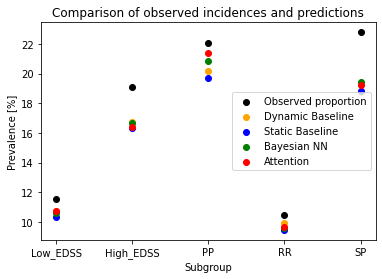

In [9]:
prop_results = {}
pred_results= {}

colors = ["orange","blue","green","red"]
for i,key in enumerate(results.keys()):
    
    prop_dict = {}
    pred_dict = {}
    df = pd.concat(results[key])
    
    df_sub = df.loc[df.EDSS_at_0<=5.5]
    prop_dict["Low_EDSS"] = df_sub.y_true.mean()
    pred_dict["Low_EDSS"] = df_sub.y_calibrated.mean()
    
    df_sub = df.loc[df.EDSS_at_0>5.5]
    prop_dict["High_EDSS"] = df_sub.y_true.mean()
    pred_dict["High_EDSS"] = df_sub.y_calibrated.mean()
    
    df_sub = df.loc[df['MSCOURSE_AT_VISIT_PP']==1]
    prop_dict["PP"] = df_sub.y_true.mean()
    pred_dict["PP"] = df_sub.y_calibrated.mean()
    
    df_sub = df.loc[df['MSCOURSE_AT_VISIT_RR']==1]
    prop_dict["RR"] = df_sub.y_true.mean()
    pred_dict["RR"] = df_sub.y_calibrated.mean()
    
    df_sub = df.loc[df['MSCOURSE_AT_VISIT_SP']==1]
    prop_dict["SP"] = df_sub.y_true.mean()
    pred_dict["SP"] = df_sub.y_calibrated.mean()
    
    prop_results[key] = prop_dict
    pred_results[key] = pred_dict
    if i==0:
        plt.scatter(pred_dict.keys(),[100*prop_dict[key] for key in pred_dict.keys()],label = "Observed proportion", color = "black") 

    plt.scatter(pred_dict.keys(),[100*pred_dict[key] for key in pred_dict.keys()],label = key, color = colors[i])
    
plt.legend()
plt.title("Comparison of observed incidences and predictions")
plt.xlabel("Subgroup")
plt.ylabel("Prevalence [%]")
plt.savefig(f"./plots/prevalence.pdf")
plt.show()